# StrokeSafe Feature - Analysis and Model Development
### Background

### Business situation description

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

## Source Data Background
#### source data and link: https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset?resource=download


In [60]:
#Load data - data file is local
data = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

data.head()

print ("number of rows: ", len(data))

number of rows:  349


### Features information
##### *note*: This dataset provides a comprehensive compilation of symptoms and patient profiles for a wide range of diseases.
##### *Data size*: 20kb file size, tabular format, 349 rows x 11 columns

- **Disease** : The name of the disease or medical condition under consideration.
- **Fever**: Indicates whether the patient has a fever (Yes/No).
- **Cough**: Indicates whether the patient has a cough (Yes/No).
- **Fatigue**: Indicates whether the patient experiences fatigue (Yes/No).
- **Difficulty Breathing**: Indicates whether the patient has difficulty breathing (Yes/No).
- **Age**: The age of the patient in years.
- **Gender**: The gender of the patient (Male/Female).
- **Blood Pressure**: The blood pressure level of the patient (Normal/High).
- **Cholesterol Level**: The cholesterol level of the patient (Normal/High).
- **Outcome Variable**: The outcome variable indicating the result of the diagnosis or assessment for the specific disease(Positive/Negative)

In [61]:
#check is any nulls in dataset - will need to drop rows with missing data
data.isnull().sum()
#no null data was found

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [78]:
#basic data info

#df.groupby(['Animal']).mean()
grouped_sorted = data.groupby('Disease').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)

print("Disease record counts: \n", grouped_sorted)

Disease record counts: 
                               Disease  Counts
6                              Asthma      23
101                            Stroke      16
77                       Osteoporosis      14
51                       Hypertension      10
69                           Migraine      10
..                                ...     ...
78       Otitis Media (Ear Infection)       1
79                     Ovarian Cancer       1
80                  Pancreatic Cancer       1
21   Chronic Obstructive Pulmonary...       1
0                                Acne       1

[116 rows x 2 columns]


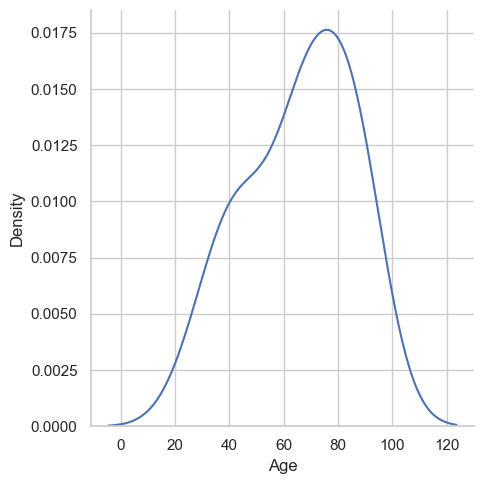

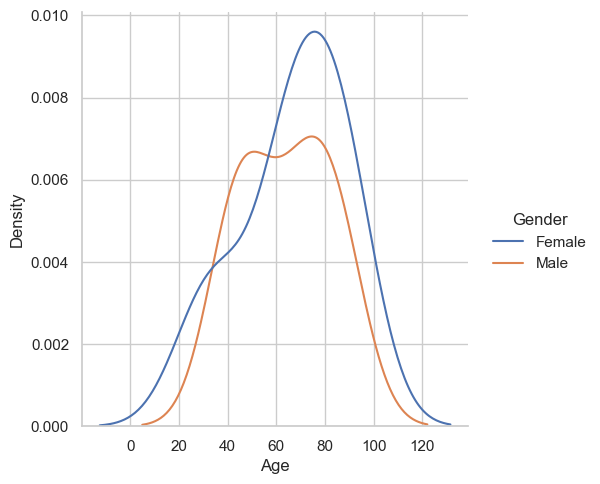

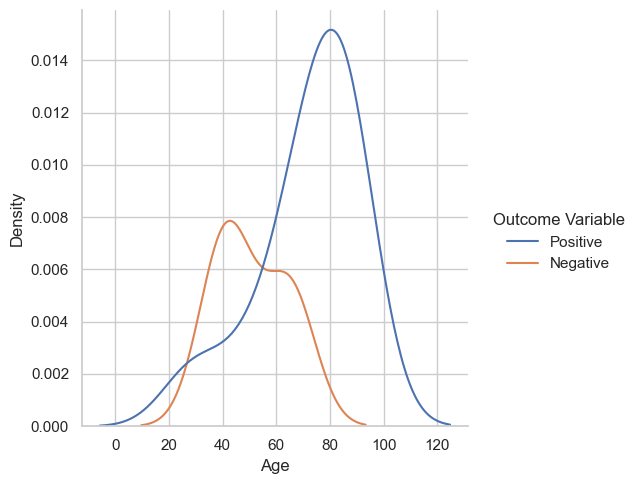

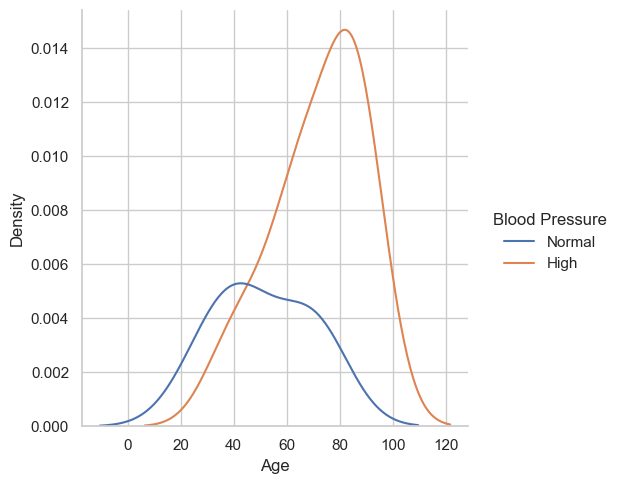

In [62]:
#introductory data analysis to understand data set

#create data set for influenza only
#print(df.loc[df['B'].isin(['one','three'])])
flu = data.loc[data['Disease'].isin(['Influenza'])]
stroke = data.loc[data['Disease'].isin(['Stroke'])]

df = stroke

sns.displot(data=df, x="Age", kind="kde")

sns.displot(data=df, x="Age", hue="Gender", kind="kde")

sns.displot(data=df, x="Age", hue="Outcome Variable", kind="kde")

sns.displot(data=df, x="Age", hue="Blood Pressure", kind="kde")

#note analysis of Flu data indicated dataset too small for effective analysis

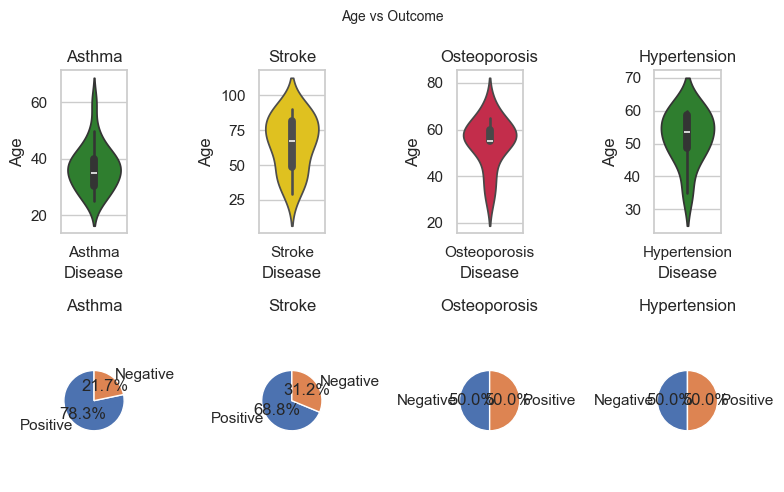

In [63]:
#violin plots of selected disease types
top_diseases = data['Disease'].value_counts().nlargest(4).index.tolist()

#use this to review specific diseases
focus_diseases =['Influenza','Common Cold','Asthma']

colors = ['forestgreen', 'gold', 'crimson']

num_diseases = len(top_diseases)
num_columns = num_diseases
fig, axes = plt.subplots(2, num_columns, figsize=(8, 5))

diseases_to_analyze = top_diseases

for i, disease in enumerate(diseases_to_analyze):
    filtered_df = data[data['Disease'] == disease]

    sns.violinplot(x='Disease', y='Age', data=filtered_df, ax=axes[0, i], color=colors[i % len(colors)])
    axes[0, i].set_title(disease)
    axes[0, i].set_xlabel('Disease')
    axes[0, i].set_ylabel('Age')

    outcome_counts = filtered_df['Outcome Variable'].value_counts()

    axes[1, i].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
    axes[1, i].set_title(disease)
    axes[1, i].axis('equal')
    
fig.suptitle('Age vs Outcome', fontsize = 10)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout()
plt.show()


In [64]:
#review of data types in dataframe

# for col in flu.columns:
#     print(flu[col].dtype)

df = flu

def show_basic_pd_stats(df):
    result = pd.DataFrame({"values":{col:df[col].unique() for col in df},
                  'type':{col:df[col].dtype for col in df},
                  'unique values':{col:len(df[col].unique()) for col in df},
                  'NA values':{col:str(round(sum(df[col].isna())/len(df),2))+'%' for col in df},
                  'Duplicated Values':{col:sum(df[col].duplicated()) for col in df}
                 })
    return result

print("\n length of dataset: ",len(df))
print("Flu")
print(show_basic_pd_stats(flu))

print("\n\n Full dataset")
show_basic_pd_stats(data)


 length of dataset:  8
Flu
                                        values    type  unique values  \
Disease                            [Influenza]  object              1   
Fever                                [Yes, No]  object              2   
Cough                                [No, Yes]  object              2   
Fatigue                              [Yes, No]  object              2   
Difficulty Breathing                 [Yes, No]  object              2   
Age                   [19, 25, 30, 38, 42, 56]   int64              6   
Gender                          [Female, Male]  object              2   
Blood Pressure             [Low, Normal, High]  object              3   
Cholesterol Level               [Normal, High]  object              2   
Outcome Variable          [Positive, Negative]  object              2   

                     NA values  Duplicated Values  
Disease                   0.0%                  7  
Fever                     0.0%                  6  
Cough       

,values,type,unique values,NA values,Duplicated Values
Disease,"[Influenza, Common Cold, Eczema, Asthma, Hyper...",object,116,0.0%,233
Fever,"[Yes, No]",object,2,0.0%,347
Cough,"[No, Yes]",object,2,0.0%,347
Fatigue,"[Yes, No]",object,2,0.0%,347
Difficulty Breathing,"[Yes, No]",object,2,0.0%,347
Age,"[19, 25, 28, 29, 30, 31, 32, 35, 38, 39, 40, 4...",int64,26,0.0%,323
Gender,"[Female, Male]",object,2,0.0%,347
Blood Pressure,"[Low, Normal, High]",object,3,0.0%,346
Cholesterol Level,"[Normal, Low, High]",object,3,0.0%,346
Outcome Variable,"[Positive, Negative]",object,2,0.0%,347


Text(0.5, 1.0, 'Disease Indicators Correlation Heatmap')

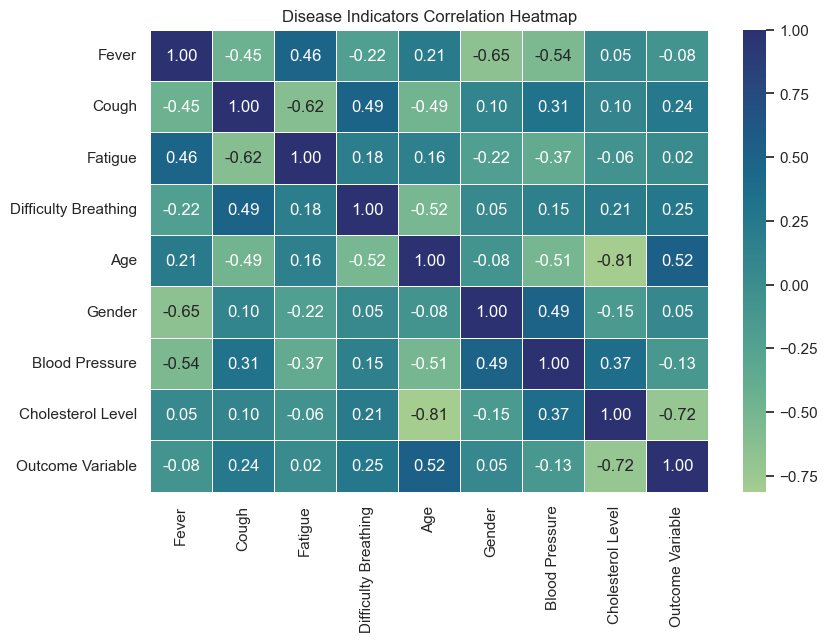

In [65]:
#correlation analysis and heatmap
sns.set_theme()

df = stroke.copy(deep=True)
df = df.loc[:, stroke.columns != 'Disease']
#do some data cleanup
change_col = ['Fever','Cough','Fatigue','Difficulty Breathing','Gender','Blood Pressure','Cholesterol Level','Outcome Variable']
encoder = LabelEncoder()
for i in change_col:
    df[i] = encoder.fit_transform(df[i])

corr_grid = df.corr(method="pearson")

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_grid, annot=True, linewidths=.5, ax=ax, fmt='.2f', cmap="crest", cbar=True)

#sns.heatmap(corr_grid, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Disease Indicators Correlation Heatmap")

## Correlation Analysis ##

Review of the stroke subset of data shows probable correlations between age and outcome, gender and blood pressure, cough and difficulty breathing, blood pressure and cough, and negative correlation between blood pressure and fever.  Reviewing the outcome only target feature, there appears to be correlations for Cholesterol level, age, cough, and difficulty breathing.

16


<Axes: xlabel='Cholesterol Level', ylabel='Outcome Variable'>

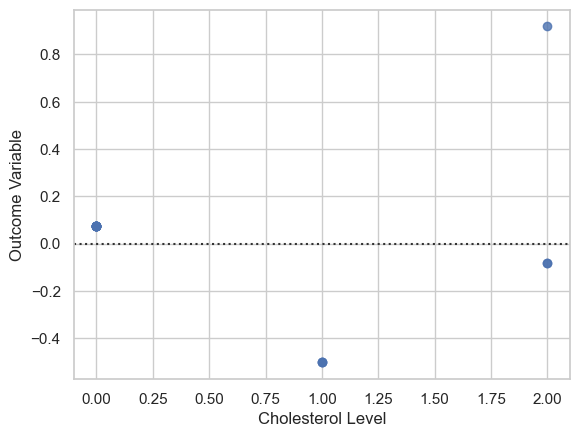

In [72]:
#lets plot some residuals to explore some key appearing features

#let's take a look at the residuals from a linear model
sns.set_theme(style="whitegrid")

print(len(df))

# Plot the residuals after fitting a linear model
sns.residplot(data=df, x="Cholesterol Level", y="Outcome Variable")

### Exploratory Modeling ###

In order to determine if the features indicate a possible prediction capability for the StrokeSafe monitoring device, we begin with simple linear regression models.

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#train test split

X = df.drop(columns = 'Outcome Variable') #features
y = df['Outcome Variable'] #labels

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 4321)

# Need to transform features that are categorical
categorical_features = ['Gender','Blood Pressure','Cholesterol Level']

# Create a ColumnTransformer to one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Leave numerical features unchanged
)

# Create a pipeline that first one-hot encodes the data then applies linear regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(x_train, y_train)

# Predict on the testing set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"OLS Mean Squared Error: {mse}")

print(f"OLS Model summary")
print(f"OLS R2: {model.score(X, y)}")


OLS Mean Squared Error: 0.0639670149010318
OLS Model summary
OLS R2: 0.9214059486472155


In [51]:
#try Lasso and Ridge combination through ElasticNet

from sklearn.linear_model import ElasticNet

model = ElasticNet(random_state = 0, l1_ratio = 0.25)
#train the model
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"ElasticNet Mean Squared Error: {mse}")

print(f"ElasticNet Model summary")
print(f"ElasticNet R2: {model.score(X, y)}")


ElasticNet Mean Squared Error: 0.22687316453866438
ElasticNet Model summary
ElasticNet R2: 0.23474878916557207
